In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
engine = create_engine("sqlite:///mta_data.db")

In [3]:
df = pd.read_sql('SELECT * FROM mta_data;', engine)

In [4]:
# Number of stations
station_count = pd.read_sql('''SELECT COUNT(DISTINCT STATION) AS stations
                                            FROM mta_data;''', engine)

station_count

,stations
0,379


In [5]:
# Look at how time is being counted
time_list = pd.read_sql('''SELECT DISTINCT "TIME" AS time_list
                            FROM mta_data
                            LIMIT 30;''', engine)
time_list

,time_list
0,03:00:00
1,07:00:00
2,11:00:00
3,15:00:00
4,19:00:00
5,23:00:00
6,01:00:00
7,05:00:00
8,09:00:00
9,13:00:00


In [6]:
# Unique values of desc
desc_unique_values = pd.read_sql('''SELECT DISTINCT DESC AS unique_values
                                            FROM mta_data;''', engine)

desc_unique_values

,unique_values
0,REGULAR
1,RECOVR AUD


In [7]:
# Get data for use in turnstile analysis
filtered_data = pd.read_sql('''SELECT STATION, "C/A", UNIT, SCP, "DATE", "TIME", "DESC", ENTRIES, EXITS
                                FROM mta_data
                                WHERE ENTRIES IS NOT NULL and EXITS IS NOT NULL
                                ORDER BY STATION, "C/A", UNIT, SCP, "DATE","TIME";''', engine)

In [8]:
filtered_data

,STATION,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS
0,1 AV,H007,R248,00-00-00,09/25/2021,00:00:00,REGULAR,15629798,18088480
1,1 AV,H007,R248,00-00-00,09/25/2021,04:00:00,REGULAR,15629818,18088663
2,1 AV,H007,R248,00-00-00,09/25/2021,08:00:00,REGULAR,15629836,18088846
3,1 AV,H007,R248,00-00-00,09/25/2021,12:00:00,REGULAR,15629915,18089265
4,1 AV,H007,R248,00-00-00,09/25/2021,16:00:00,REGULAR,15630074,18089829
...,...,...,...,...,...,...,...,...,...
2732598,ZEREGA AV,R419,R326,00-05-01,12/24/2021,04:00:00,REGULAR,39,259
2732599,ZEREGA AV,R419,R326,00-05-01,12/24/2021,08:00:00,REGULAR,39,259
2732600,ZEREGA AV,R419,R326,00-05-01,12/24/2021,12:00:00,REGULAR,39,259
2732601,ZEREGA AV,R419,R326,00-05-01,12/24/2021,16:00:00,REGULAR,39,259


In [9]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732603 entries, 0 to 2732602
Data columns (total 9 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   STATION  object
 1   C/A      object
 2   UNIT     object
 3   SCP      object
 4   DATE     object
 5   TIME     object
 6   DESC     object
 7   ENTRIES  int64 
 8   EXITS    int64 
dtypes: int64(2), object(7)
memory usage: 187.6+ MB


In [10]:
filtered_data.describe().style.format('{:0.1f}')

,ENTRIES,EXITS
count,2732603.0,2732603.0
mean,42017940.6,33863906.6
std,220469201.1,194582395.6
min,0.0,0.0
25%,233055.0,114415.0
50%,1369239.0,855522.0
75%,6007727.0,3992825.0
max,2147375153.0,2122704407.0


In [11]:
filtered_data.shape

(2732603, 9)

In [12]:
df["date_time"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S") #create date_time column

In [13]:
df.columns = [column.strip().lower().replace('/','_') for column in df.columns] #reformat

In [122]:
df.tail(30)

13        2021-12-20 07:00:00
844351    2021-11-22 19:00:00
844350    2021-11-22 15:00:00
844349    2021-11-22 11:00:00
844348    2021-11-22 07:00:00
2290008   2021-10-11 04:00:00
2290009   2021-10-11 08:00:00
2290010   2021-10-11 12:00:00
2290011   2021-10-11 16:00:00
2290012   2021-10-11 20:00:00
844352    2021-11-22 23:00:00
844310    2021-11-22 23:00:00
844308    2021-11-22 15:00:00
844307    2021-11-22 11:00:00
844306    2021-11-22 07:00:00
844268    2021-11-22 23:00:00
844267    2021-11-22 19:00:00
844266    2021-11-22 15:00:00
844265    2021-11-22 11:00:00
844264    2021-11-22 07:00:00
2290051   2021-10-11 08:00:00
844309    2021-11-22 19:00:00
2290052   2021-10-11 12:00:00
844390    2021-11-22 07:00:00
844392    2021-11-22 15:00:00
2289925   2021-10-11 08:00:00
2289926   2021-10-11 12:00:00
2289927   2021-10-11 16:00:00
2289928   2021-10-11 20:00:00
844478    2021-11-22 23:00:00
Name: date_time, dtype: datetime64[ns]

In [15]:
# Remove duplicates
print("prior shape: ", df.shape)
df.drop_duplicates(subset=["station", "date_time",'c_a','unit','scp'],inplace=True)
print("post shape: ", df.shape)

prior shape:  (2732603, 12)
post shape:  (2732548, 12)


In [16]:
#check for duplicates
(df
 .groupby(["c_a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False))

,c_a,unit,scp,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2021-09-25 00:00:00,1
1821692,R141,R031,00-03-02,34 ST-PENN STA,2021-12-21 15:00:00,1
1821694,R141,R031,00-03-02,34 ST-PENN STA,2021-12-21 23:00:00,1
1821695,R141,R031,00-03-02,34 ST-PENN STA,2021-12-22 03:00:00,1
1821696,R141,R031,00-03-02,34 ST-PENN STA,2021-12-22 07:00:00,1
...,...,...,...,...,...,...
910850,N128,R200,00-00-03,EUCLID AV,2021-11-11 15:00:00,1
910851,N128,R200,00-00-03,EUCLID AV,2021-11-11 19:00:00,1
910852,N128,R200,00-00-03,EUCLID AV,2021-11-11 23:00:00,1
910853,N128,R200,00-00-03,EUCLID AV,2021-11-12 03:00:00,1


In [17]:
df.loc[df['desc'] == 'RECOVR AUD']

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
4957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,16:00:00,RECOVR AUD,425175,1467688,2021-12-20 16:00:00
4958,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,20:00:00,RECOVR AUD,425283,1468035,2021-12-20 20:00:00
4999,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,16:00:00,RECOVR AUD,2692260,3446144,2021-12-20 16:00:00
5000,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,20:00:00,RECOVR AUD,2692480,3446379,2021-12-20 20:00:00
5041,A033,R170,02-00-02,14 ST-UNION SQ,LNQR456W,BMT,12/20/2021,16:00:00,RECOVR AUD,15374936,15028808,2021-12-20 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2730938,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/29/2021,04:00:00,RECOVR AUD,1400219,324,2021-09-29 04:00:00
2730939,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/29/2021,08:00:00,RECOVR AUD,1400318,324,2021-09-29 08:00:00
2730948,S101,R070,00-00-02,ST. GEORGE,1,SRT,09/30/2021,04:00:00,RECOVR AUD,1216784,140,2021-09-30 04:00:00
2730959,S101,R070,00-00-02,ST. GEORGE,1,SRT,10/01/2021,04:00:00,RECOVR AUD,1216979,140,2021-10-01 04:00:00


In [18]:
#Creat time interval column
df['audit_length_hours'] = df.groupby(['c_a', 'unit', 'scp', 'station'])['date_time'].transform(lambda x: x.diff())

In [19]:
df['audit_length_hours'] = df.audit_length_hours.dt.total_seconds() / 3600

In [20]:
df.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,audit_length_hours
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023,2021-12-18 03:00:00,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00,4.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00,4.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00,4.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00,4.0


In [21]:
# Drop Nulls created by previous cell
print("prior shape: ", df.shape)
df.dropna(how='any', inplace=True)
print("post shape: ", df.shape)

prior shape:  (2732548, 13)
post shape:  (2727504, 13)


In [22]:
# Drop unnecessary columns
df = df.drop(['linename', 'division', 'date', 'desc'], axis=1)

In [23]:
df.columns

Index(['c_a', 'unit', 'scp', 'station', 'time', 'entries', 'exits',
       'date_time', 'audit_length_hours'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727504 entries, 1 to 2732602
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   c_a                 object        
 1   unit                object        
 2   scp                 object        
 3   station             object        
 4   time                object        
 5   entries             int64         
 6   exits               int64         
 7   date_time           datetime64[ns]
 8   audit_length_hours  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 208.1+ MB


In [25]:
df.isnull().sum()

c_a                   0
unit                  0
scp                   0
station               0
time                  0
entries               0
exits                 0
date_time             0
audit_length_hours    0
dtype: int64

In [26]:
df.head(20)

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours
1,A002,R051,02-00-00,59 ST,07:00:00,7672969,2645040,2021-12-18 07:00:00,4.0
2,A002,R051,02-00-00,59 ST,11:00:00,7672991,2645127,2021-12-18 11:00:00,4.0
3,A002,R051,02-00-00,59 ST,15:00:00,7673037,2645193,2021-12-18 15:00:00,4.0
4,A002,R051,02-00-00,59 ST,19:00:00,7673097,2645270,2021-12-18 19:00:00,4.0
5,A002,R051,02-00-00,59 ST,23:00:00,7673128,2645283,2021-12-18 23:00:00,4.0
6,A002,R051,02-00-00,59 ST,03:00:00,7673141,2645289,2021-12-19 03:00:00,4.0
7,A002,R051,02-00-00,59 ST,07:00:00,7673146,2645299,2021-12-19 07:00:00,4.0
8,A002,R051,02-00-00,59 ST,11:00:00,7673153,2645360,2021-12-19 11:00:00,4.0
9,A002,R051,02-00-00,59 ST,15:00:00,7673179,2645407,2021-12-19 15:00:00,4.0
10,A002,R051,02-00-00,59 ST,19:00:00,7673218,2645445,2021-12-19 19:00:00,4.0


In [27]:
df.audit_length_hours.unique()

array([4.        , 1.75666667, 0.02166667, ..., 2.7475    , 3.04722222,
       0.95277778])

In [28]:
df.audit_length_hours.value_counts()

 4.000000      2481263
 4.200000       159000
-332.000000      46474
-335.000000       5195
 3.000000         4654
                ...   
-328.033889          1
 3.198056            1
-252.278611          1
-327.950556          1
-332.355278          1
Name: audit_length_hours, Length: 4050, dtype: int64

In [29]:
df = df[df['audit_length_hours']== 4] #Remove all audit_length_hours that aren't = 4

In [30]:
df.audit_length_hours.value_counts()

4.0    2481263
Name: audit_length_hours, dtype: int64

In [31]:
# Create 'DOW' (Day of Week) column from 'DATETIME'
df['dow'] = df[['date_time']]\
    .apply(lambda x: datetime.datetime.strftime(x['date_time'], '%A'), axis=1)

In [32]:
df.head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow
1,A002,R051,02-00-00,59 ST,07:00:00,7672969,2645040,2021-12-18 07:00:00,4.0,Saturday
2,A002,R051,02-00-00,59 ST,11:00:00,7672991,2645127,2021-12-18 11:00:00,4.0,Saturday
3,A002,R051,02-00-00,59 ST,15:00:00,7673037,2645193,2021-12-18 15:00:00,4.0,Saturday
4,A002,R051,02-00-00,59 ST,19:00:00,7673097,2645270,2021-12-18 19:00:00,4.0,Saturday
5,A002,R051,02-00-00,59 ST,23:00:00,7673128,2645283,2021-12-18 23:00:00,4.0,Saturday


In [33]:
df.dow.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [34]:
#Remove the weekend days
df = df[df['dow'] != 'Saturday']
df = df[df['dow'] != 'Sunday']

In [35]:
df.dow.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [36]:
df.head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow
12,A002,R051,02-00-00,59 ST,03:00:00,7673254,2645470,2021-12-20 03:00:00,4.0,Monday
13,A002,R051,02-00-00,59 ST,07:00:00,7673256,2645515,2021-12-20 07:00:00,4.0,Monday
14,A002,R051,02-00-00,59 ST,11:00:00,7673289,2645768,2021-12-20 11:00:00,4.0,Monday
15,A002,R051,02-00-00,59 ST,15:00:00,7673355,2645849,2021-12-20 15:00:00,4.0,Monday
16,A002,R051,02-00-00,59 ST,19:00:00,7673522,2645916,2021-12-20 19:00:00,4.0,Monday


In [37]:
df.shape

(1816210, 10)

In [38]:
# Create diff columns to take entries/exits for given time interval
df['entry_diff'] = df.groupby(['c_a', 'unit', 'scp', 'station'], as_index=False)['entries'].transform(lambda x: x.diff())
df['exit_diff'] = df.groupby(['station','c_a', 'unit', 'scp'], as_index=False)['exits'].diff()

In [39]:
df.head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff
12,A002,R051,02-00-00,59 ST,03:00:00,7673254,2645470,2021-12-20 03:00:00,4.0,Monday,NaN,NaN
13,A002,R051,02-00-00,59 ST,07:00:00,7673256,2645515,2021-12-20 07:00:00,4.0,Monday,2.0,45.0
14,A002,R051,02-00-00,59 ST,11:00:00,7673289,2645768,2021-12-20 11:00:00,4.0,Monday,33.0,253.0
15,A002,R051,02-00-00,59 ST,15:00:00,7673355,2645849,2021-12-20 15:00:00,4.0,Monday,66.0,81.0
16,A002,R051,02-00-00,59 ST,19:00:00,7673522,2645916,2021-12-20 19:00:00,4.0,Monday,167.0,67.0


In [40]:
# Drop Nulls created by previous groupby().diff()
print("prior shape: ", df.shape)
df.dropna(how='any', inplace=True)
print("post shape: ", df.shape)

prior shape:  (1816210, 12)
post shape:  (1811506, 12)


In [41]:
#All negative values for entries and exits should be dropped from dataset since values should be accumulative 
len_entry_diffs = df['entry_diff'].shape[0]
len_exit_diffs = df['exit_diff'].shape[0]

negative_entries = df[df['entry_diff'] < 0].shape[0]
negative_exits = df[df['exit_diff'] < 0].shape[0]

print('negative_entries: ', negative_entries)
print('negative_exits: ', negative_exits)

# Drop negatives
print("prior shape: ", df.shape)
df = df.loc[(df['entry_diff'] > 0) & (df['exit_diff'] > 0)]
print("post shape: ", df.shape)

negative_entries:  69669
negative_exits:  62927
prior shape:  (1811506, 12)
post shape:  (1442558, 12)


In [42]:
df.head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff
13,A002,R051,02-00-00,59 ST,07:00:00,7673256,2645515,2021-12-20 07:00:00,4.0,Monday,2.0,45.0
14,A002,R051,02-00-00,59 ST,11:00:00,7673289,2645768,2021-12-20 11:00:00,4.0,Monday,33.0,253.0
15,A002,R051,02-00-00,59 ST,15:00:00,7673355,2645849,2021-12-20 15:00:00,4.0,Monday,66.0,81.0
16,A002,R051,02-00-00,59 ST,19:00:00,7673522,2645916,2021-12-20 19:00:00,4.0,Monday,167.0,67.0
17,A002,R051,02-00-00,59 ST,23:00:00,7673565,2645940,2021-12-20 23:00:00,4.0,Monday,43.0,24.0


In [43]:
# Create threshold based on total seconds in a day: Assuming that each sec cannot have more than 1 person going through the turnstile at one time
threshold_entry = 86400
threshold_exit = 86400

# Drop outliers
print("prior shape: ", df.shape)
df = df[(df['entry_diff'] < threshold_entry) & (df['exit_diff'] < threshold_exit)]
print("post shape: ", df.shape)

prior shape:  (1442558, 12)
post shape:  (1442441, 12)


In [44]:
# Create 'Impression Per 4hrs" = exits + entries. This will be our ranking metric
df['ip_4hrs'] = df['entry_diff'] + df['exit_diff']
df.sort_values('ip_4hrs', ascending=False).head()

,c_a,unit,scp,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs
1118819,N116,R198,00-05-01,NOSTRAND AV,03:00:00,82961,50952,2021-11-15 03:00:00,4.0,Monday,80744.0,49183.0,129927.0
1329610,N116,R198,00-05-01,NOSTRAND AV,03:00:00,80301,49161,2021-11-08 03:00:00,4.0,Monday,80078.0,48986.0,129064.0
1657838,R423,R429,00-00-01,PELHAM BAY PARK,00:00:00,37056,62340,2021-11-01 00:00:00,4.0,Monday,35749.0,59965.0,95714.0
1214665,R240,R047,00-03-00,GRD CNTRL-42 ST,00:00:00,55216,43989,2021-11-15 00:00:00,4.0,Monday,50267.0,40042.0,90309.0
1426243,R240,R047,00-03-00,GRD CNTRL-42 ST,00:00:00,52326,41664,2021-11-08 00:00:00,4.0,Monday,49610.0,39749.0,89359.0


In [45]:
df = df.drop(['c_a', 'scp','unit'], axis=1) #getting rid of un-needed columns


In [46]:
#Top 10 station for traffic
df_station_traffic = df.groupby(['station'])['ip_4hrs'].sum().sort_values(ascending = False).head(10)
df_station_traffic = pd.DataFrame(df_station_traffic.reset_index())
df_station_traffic.rename(columns={"ip_4hrs": "total_traffic"}, inplace=True)
df_station_traffic

,station,total_traffic
0,34 ST-PENN STA,9180716.0
1,GRD CNTRL-42 ST,7287607.0
2,34 ST-HERALD SQ,6574199.0
3,86 ST,6173482.0
4,14 ST-UNION SQ,5933805.0
5,23 ST,5758017.0
6,TIMES SQ-42 ST,5153509.0
7,42 ST-PORT AUTH,5126354.0
8,FULTON ST,5012348.0
9,125 ST,4940299.0


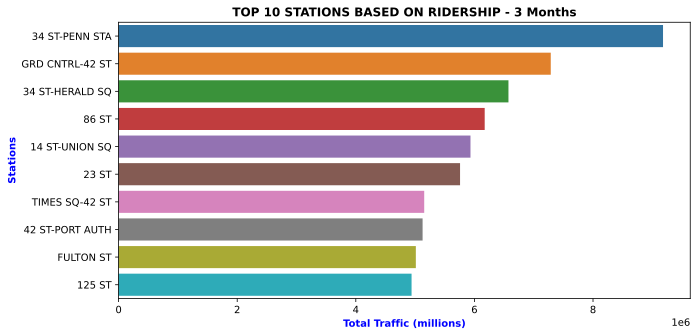

In [123]:
#Plot graph for TOP 10 STATIONS BASED ON RIDERSHIP NUMBERS
plt.figure(figsize=(10,5))
plt.title("TOP 10 STATIONS BASED ON RIDERSHIP - 3 Months", fontweight="bold")
sns.barplot(data= df_station_traffic, y = df_station_traffic.station, x = df_station_traffic.total_traffic)
plt.xlabel('Total Traffic (millions)', color='blue', fontweight="bold")
plt.ylabel('Stations',color='blue',fontweight="bold")
plt.tight_layout(pad=1.8);
plt.savefig('Top 10 Ridership Stations_final.jpeg');


In [48]:
# Top days of the week for RIDERSHIP NUMBERS
df_DOW = df.groupby(['dow'])['ip_4hrs'].sum().reset_index()
df_mapping = pd.DataFrame({'dow':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']})
sort_mapping = df_mapping.reset_index().set_index('dow')
df_DOW['dow_reindex'] = df_DOW['dow'].map(sort_mapping['index'])
df_DOW = df_DOW.sort_values('dow_reindex')
df_DOW.rename(columns={"ip_4hrs": "total_traffic"}, inplace=True)
df_DOW

,dow,total_traffic,dow_reindex
1,Monday,65003613.0,0
3,Tuesday,65835594.0,1
4,Wednesday,67959225.0,2
2,Thursday,64904771.0,3
0,Friday,64183763.0,4


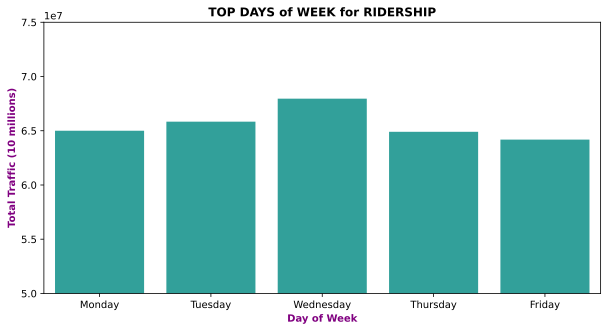

In [98]:
#Plot Top days of the week for RIDERSHIP NUMBERS
plt.figure(figsize=(10,5))
plt.title("TOP DAYS of WEEK for RIDERSHIP", fontweight="bold")
plt.ylim([50000000,75000000])
sns.barplot(data= df_DOW, x = df_DOW.dow, y = df_DOW.total_traffic, color = '#20B2AA')
plt.ylabel('Total Traffic (10 millions)', color='purple', fontweight="bold")
plt.xlabel('Day of Week', color='purple', fontweight="bold");
# plt.savefig('TOP DAYS of WEEK for RIDERSHIP_final.jpeg');

In [50]:
df.reset_index().head()

,index,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs
0,13,59 ST,07:00:00,7673256,2645515,2021-12-20 07:00:00,4.0,Monday,2.0,45.0,47.0
1,14,59 ST,11:00:00,7673289,2645768,2021-12-20 11:00:00,4.0,Monday,33.0,253.0,286.0
2,15,59 ST,15:00:00,7673355,2645849,2021-12-20 15:00:00,4.0,Monday,66.0,81.0,147.0
3,16,59 ST,19:00:00,7673522,2645916,2021-12-20 19:00:00,4.0,Monday,167.0,67.0,234.0
4,17,59 ST,23:00:00,7673565,2645940,2021-12-20 23:00:00,4.0,Monday,43.0,24.0,67.0


In [51]:
#Re-indexing the days of the week 
df_mapping = pd.DataFrame({'dow':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']})
sort_mapping = df_mapping.reset_index().set_index('dow')
df['dow_reindex'] = df['dow'].map(sort_mapping['index'])
df = df.sort_values('dow_reindex')
df.head()

,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs,dow_reindex
13,59 ST,07:00:00,7673256,2645515,2021-12-20 07:00:00,4.0,Monday,2.0,45.0,47.0,0
844351,TIMES SQ-42 ST,19:00:00,2944607,1403584,2021-11-22 19:00:00,4.0,Monday,259.0,58.0,317.0,0
844350,TIMES SQ-42 ST,15:00:00,2944348,1403526,2021-11-22 15:00:00,4.0,Monday,71.0,46.0,117.0,0
844349,TIMES SQ-42 ST,11:00:00,2944277,1403480,2021-11-22 11:00:00,4.0,Monday,58.0,160.0,218.0,0
844348,TIMES SQ-42 ST,07:00:00,2944219,1403320,2021-11-22 07:00:00,4.0,Monday,5.0,7.0,12.0,0


In [52]:
top_10_station = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '86 ST', '34 ST-HERALD SQ', '14 ST-UNION SQ', '23 ST',
                    'FULTON ST', '125 ST', '42 ST-PORT AUTH', 'TIMES SQ-42 ST']

In [53]:
#Creating DataFrame of Top 10 Stations
mask = (df.station.isin(top_10_station))
df_top_station = df[mask]
df_top_station.head()

,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs,dow_reindex
844351,TIMES SQ-42 ST,19:00:00,2944607,1403584,2021-11-22 19:00:00,4.0,Monday,259.0,58.0,317.0,0
844350,TIMES SQ-42 ST,15:00:00,2944348,1403526,2021-11-22 15:00:00,4.0,Monday,71.0,46.0,117.0,0
844349,TIMES SQ-42 ST,11:00:00,2944277,1403480,2021-11-22 11:00:00,4.0,Monday,58.0,160.0,218.0,0
844348,TIMES SQ-42 ST,07:00:00,2944219,1403320,2021-11-22 07:00:00,4.0,Monday,5.0,7.0,12.0,0
844352,TIMES SQ-42 ST,23:00:00,2944709,1403604,2021-11-22 23:00:00,4.0,Monday,102.0,20.0,122.0,0


In [54]:
#Creating a DataFrame of all station times between noon and 11pm 
df_top_station_mean = df_top_station.groupby(['station','date_time','time','dow'])['ip_4hrs'].mean().reset_index()
mask = (df_top_station_mean.date_time.dt.hour >= 12) & (df_top_station_mean.date_time.dt.hour <= 23)
df_2_10pm = df_top_station_mean[mask]
df_2_10pm = df_2_10pm.sort_values(by='time')
df_2_10pm.tail(100)

,station,date_time,time,dow,ip_4hrs
6122,GRD CNTRL-42 ST,2021-11-18 23:00:00,23:00:00,Thursday,223.941176
6027,GRD CNTRL-42 ST,2021-11-08 23:00:00,23:00:00,Monday,162.705882
3571,42 ST-PORT AUTH,2021-11-30 23:00:00,23:00:00,Tuesday,271.958333
3537,42 ST-PORT AUTH,2021-11-25 23:00:00,23:00:00,Thursday,155.541667
5002,FULTON ST,2021-11-02 23:00:00,23:00:00,Tuesday,89.896552
6252,GRD CNTRL-42 ST,2021-12-03 23:00:00,23:00:00,Friday,252.181818
4383,86 ST,2021-12-07 23:00:00,23:00:00,Tuesday,228.609756
2851,34 ST-PENN STA,2021-12-03 23:00:00,23:00:00,Friday,214.100000
427,125 ST,2021-11-16 23:00:00,23:00:00,Tuesday,273.888889
2862,34 ST-PENN STA,2021-12-06 23:00:00,23:00:00,Monday,173.760563


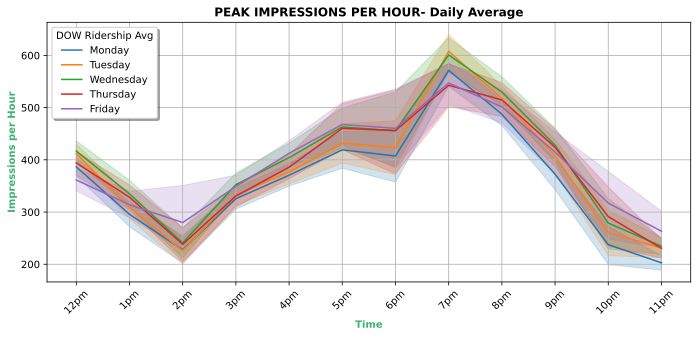

In [114]:
ticks_x = np.linspace(0,11,12)
new_hrs = ['12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']

#Plot for Peak Ridership Times
plt.figure(figsize=(10,5))
sns.lineplot(data=df_2_10pm, x="time", y="ip_4hrs", hue='dow',)
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Impressions per Hour', fontweight="bold", color='#3CB371')
plt.xlabel('Time', fontweight="bold", color='#3CB371')
plt.legend(title='DOW Ridership Avg', loc=2, shadow=True)
plt.title("PEAK IMPRESSIONS PER HOUR- Daily Average", fontweight="bold")
plt.xticks(ticks_x,new_hrs)
plt.tight_layout(pad=1.8);
# plt.savefig('PEAK IMPRESSIONS PER HOUR_dow_final.jpeg');

In [56]:
#Creat Dataframe of top 4 stations with station times between noon and 11pm 
top_4_station = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '86 ST', '34 ST-HERALD SQ']
mask = (df.station.isin(top_4_station) & (df.date_time.dt.hour >= 12) & (df.date_time.dt.hour <= 23))
df_top_4 = df[mask]

df_top_4 = df_top_4.sort_values(by='time')
df_top_4 

,station,time,entries,exits,date_time,audit_length_hours,dow,entry_diff,exit_diff,ip_4hrs,dow_reindex
2578213,34 ST-PENN STA,12:00:00,1115116,340114,2021-09-27 12:00:00,4.0,Monday,261.0,66.0,327.0,0
1949517,34 ST-PENN STA,12:00:00,3343857,4411130,2021-10-19 12:00:00,4.0,Tuesday,76.0,321.0,397.0,1
1949181,34 ST-PENN STA,12:00:00,9046605,1770486,2021-10-19 12:00:00,4.0,Tuesday,163.0,131.0,294.0,1
581420,GRD CNTRL-42 ST,12:00:00,22487,18529,2021-12-08 12:00:00,4.0,Wednesday,10.0,43.0,53.0,2
987050,86 ST,12:00:00,5065514,1499459,2021-11-25 12:00:00,4.0,Thursday,72.0,25.0,97.0,3
...,...,...,...,...,...,...,...,...,...,...,...
1212788,GRD CNTRL-42 ST,23:00:00,1379633,3841924,2021-11-17 23:00:00,4.0,Wednesday,4.0,7.0,11.0,2
1212956,GRD CNTRL-42 ST,23:00:00,6269953,4588629,2021-11-17 23:00:00,4.0,Wednesday,40.0,11.0,51.0,2
1213544,GRD CNTRL-42 ST,23:00:00,2166615,902759,2021-11-17 23:00:00,4.0,Wednesday,33.0,17.0,50.0,2
1213502,GRD CNTRL-42 ST,23:00:00,74039,100807,2021-11-17 23:00:00,4.0,Wednesday,39.0,31.0,70.0,2


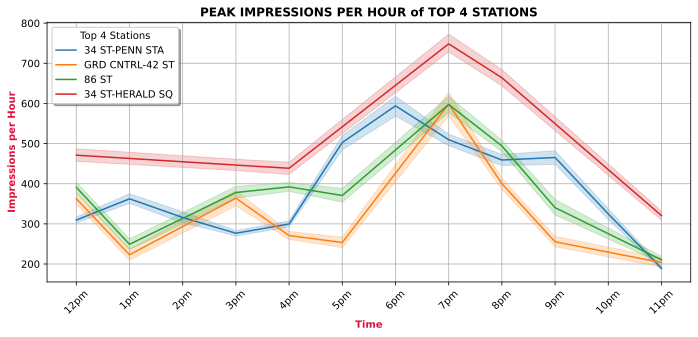

In [124]:
ticks_x = np.linspace(0,11,12)
new_hrs = ['12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']

#Plot for PEAK RIDERSHIP TIMES of TOP 4 STATIONS
plt.figure(figsize=(10,5))
sns.lineplot(data=df_top_4, x="time", y="ip_4hrs", hue='station',)
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Impressions per Hour', color='#DC143C', fontweight="bold")
plt.xlabel('Time',color='#DC143C', fontweight="bold")
plt.legend(title='Top 4 Stations', loc=2, shadow=True)
plt.title("PEAK IMPRESSIONS PER HOUR of TOP 4 STATIONS", fontweight="bold")
plt.xticks(ticks_x,new_hrs)
plt.tight_layout(pad=1.8);
# plt.savefig('PEAK IMPRESSIONS PER HOUR Top 4 Stations_final.png');
